In [1]:
import folium
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
import seaborn as sns
import datetime
import random
import time
import re

%matplotlib inline
mpl.style.use('ggplot')

In [2]:
df = pd.read_csv('../../data/raw/auto.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.replace('?',np.nan, inplace=True)
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

def str_time_prop(start, end, format, prop):
    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))
    ptime = stime + prop * (etime - stime)
    return time.strftime(format, time.localtime(ptime))

def random_date(start, end, prop):
    return str_time_prop(start, end, '%m/%d/%Y', prop)

df['year'] = [random_date("1/1/1980", "12/31/2015", random.random()) for i in range(201)]

df = df[0:195]
country = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'The former Yugoslav Republic of Macedonia', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
df['country'] = country

avg_normlos = df['normalized-losses'].astype('float').mean(axis=0)
avg_bore = df['bore'].astype('float').mean(axis=0)
avg_stroke = df['stroke'].astype('float').mean(axis=0)
avg_hp = df['horsepower'].astype('float').mean(axis=0)
avg_prpm = df['peak-rpm'].astype('float').mean(axis=0)

df["normalized-losses"].replace(np.nan, avg_normlos, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["horsepower"].replace(np.nan, avg_hp, inplace=True)
df["peak-rpm"].replace(np.nan, avg_prpm, inplace=True)
df['num-of-doors'].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace=True)

# Correct data format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df["horsepower"]=df["horsepower"].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

# Normalization
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# Examine the types of the column labels
df.columns = list(map(str, df.columns))

dfv = df[['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'engine-type',\
          'engine-size', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'year', 'country']]

---
<h1>HISTOGRAM</h1>

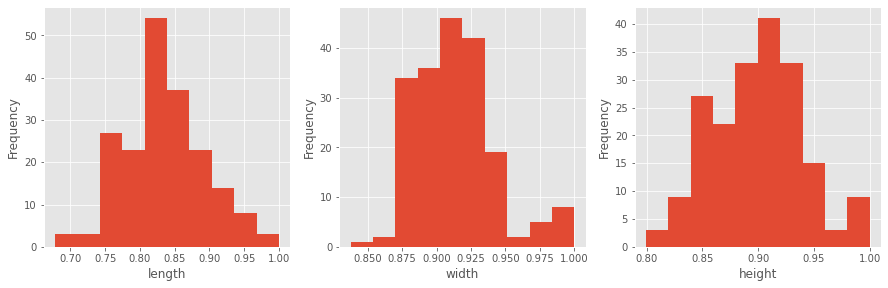

In [3]:
df_hist = dfv[['make', 'fuel-type', 'num-of-doors', 'length', 'width', 'height', 'body-style', 'price', 'year', 'country']]

fig = plt.figure()
ax0 = fig.add_subplot(3, 3, 1)
ax1 = fig.add_subplot(3, 3, 2)
ax2 = fig.add_subplot(3, 3, 3)

df_hist['length'].plot(kind='hist', figsize=(15,15), ax=ax0)
df_hist['width'].plot(kind='hist', figsize=(15,15), ax=ax1)
df_hist['height'].plot(kind='hist', figsize=(15,15), ax=ax2)
ax0.set_xlabel('length')
ax1.set_xlabel('width')
ax2.set_xlabel('height')

plt.show()

---
<h1>BAR CHART</h1>

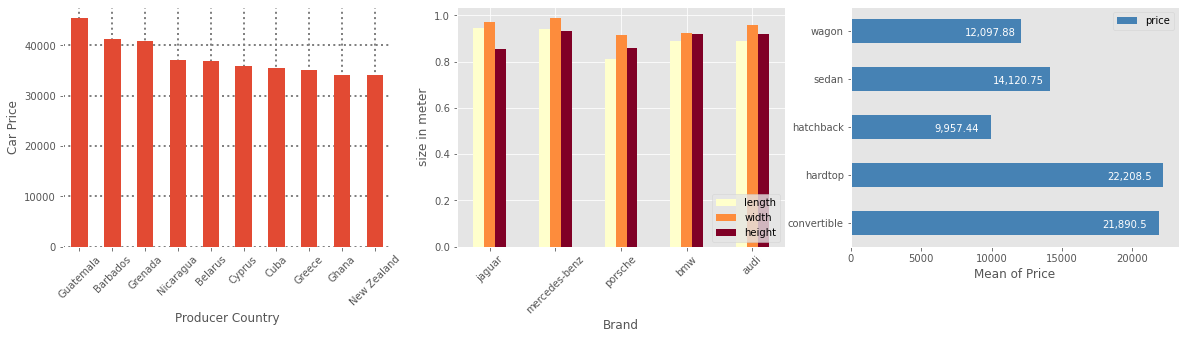

In [4]:
df_bar = dfv[['make', 'fuel-type', 'num-of-doors', 'length', 'width', 'height', 'bore', 'stroke', 'horsepower', 'body-style', 'price', 'year', 'country']]

fig = plt.figure()

ax0 = fig.add_subplot(3,3,1)
ax1 = fig.add_subplot(3,3,2)
ax2 = fig.add_subplot(3,3,3)

bar1 = df_bar.set_index('country').sort_values(['price'], ascending=False, axis=0).head(10)
bar1['price'].transpose().plot(kind='bar', ax=ax0, figsize=(15,15)).set_facecolor('w')
ax0.set_xlabel('Producer Country')
ax0.set_ylabel('Car Price')
ax0.set_xticklabels(bar1.index, rotation=45)
ax0.grid(which='major', axis='both', linestyle=':', color='grey', linewidth=2)

bar2 = df_bar[['make', 'length', 'width', 'height', 'bore', 'stroke', 'horsepower','price']].groupby('make').mean().sort_values(['price'], ascending=False, axis=0).head(5)
bar2[['length', 'width', 'height']].plot(kind='bar', ax=ax1, figsize=(15,15), colormap=mpl.cm.get_cmap('YlOrRd'))
ax1.set_xlabel('Brand')
ax1.set_ylabel('size in meter')
ax1.set_xticklabels(bar2.index, rotation=45)
ax1.legend(loc="lower right")

bar3 = df_bar[['body-style', 'price']].groupby('body-style').mean()
bar3.plot(kind='barh', ax=ax2, color='steelblue', figsize=(20,15), grid=False)
ax2.set_xlabel('Mean of Price')
ax2.set_ylabel('')
for i,v in enumerate(bar3['price']):
    label = format(round(float(v),2),',')
    ax2.annotate(label,xy=(v-4000,i-0.10), color='white')

plt.show()

---
<h1>PIE CHART</h1>

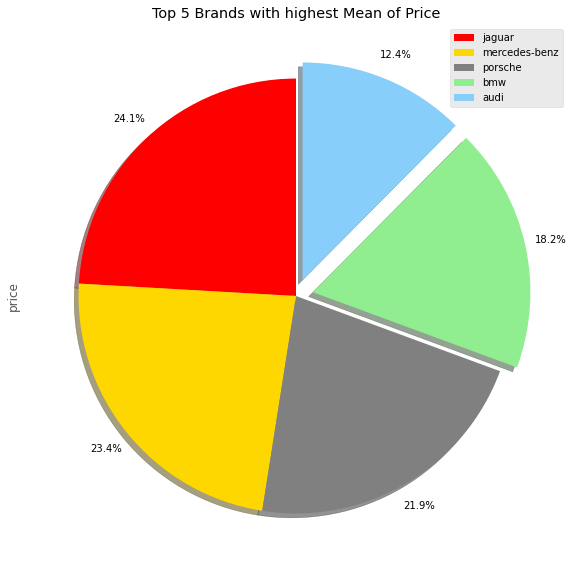

In [5]:
df_pie = dfv[['make', 'price']].groupby('make').mean().sort_values(['price'], ascending=False, axis=0).head(5)

colors = ['red', 'gold','grey','lightgreen','lightskyblue']
explode = [0,0,0,0.08,0.08]

df_pie['price'].plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',
                    startangle=90, shadow=True, labels=None,
                    colors=colors, pctdistance=1.12,
                    explode=explode)

plt.legend(labels=df_pie.index, loc='upper right')
plt.title('Top 5 Brands with highest Mean of Price', y=1)
plt.show()

---
<h1>BOX PLOT</h1>

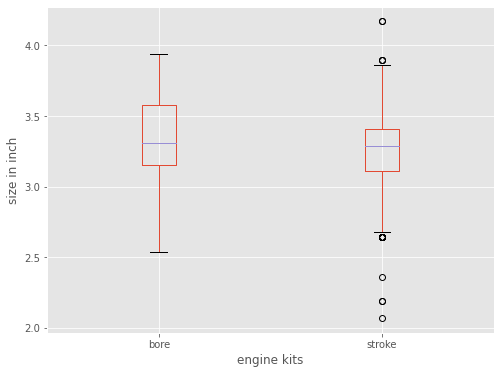

In [6]:
df_box = dfv[['bore', 'stroke']]

df_box.plot(kind='box', figsize=(8,6), vert=True)
plt.xlabel('engine kits')
plt.ylabel('size in inch')
plt.show()

---
<h1>BUBBLE PLOT</h1>

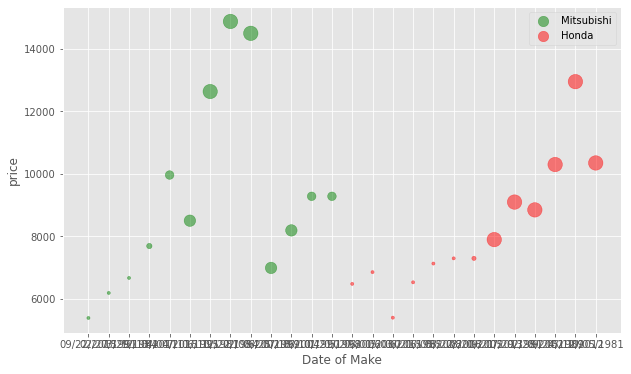

In [7]:
df_scat = dfv[['make', 'year', 'bore', 'stroke', 'horsepower', 'price']]
df_mit = df_scat[df_scat['make']=='mitsubishi']
df_hon = df_scat[df_scat['make']=='honda']

norm_mit = (df_mit['bore'] - df_mit['bore'].min()) / (df_mit['bore'].max() - df_mit['bore'].min())
norm_hon = (df_hon['bore'] - df_hon['bore'].min()) / (df_hon['bore'].max() - df_hon['bore'].min())

ax0 = df_mit.plot(kind='scatter', x='year', y='price',
                 alpha=0.5, color='green', figsize=(10,6),
                 s=norm_mit * 200 + 10)

ax1 = df_hon.plot(kind='scatter', x='year', y='price',
                 alpha=0.5, color='red', s=norm_hon * 200 + 10,
                 ax=ax0)

ax0.set_xlabel('Date of Make')
ax0.legend(['Mitsubishi', 'Honda'], loc='upper right')

plt.show()

---
<h1>WAFFLE CHART</h1>

In [8]:
def create_waffle_chart(dfn,categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (dfn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 400
alfa-romero: 95
audi: 87
bmw: 105
chevrolet: 48
dodge: 65


<Figure size 432x288 with 0 Axes>

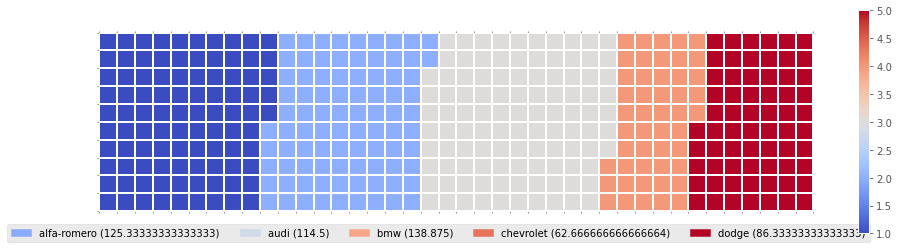

In [9]:
df_waf = dfv[['make','horsepower']].groupby('make').mean().head()

w = 40
h = 10

cat = df_waf.index.values
val = df_waf['horsepower']
colmap = plt.cm.coolwarm

create_waffle_chart(df_waf,cat,val,h,w,colmap)
plt.show()

---
<h1>WORD CLOUDS</h1>

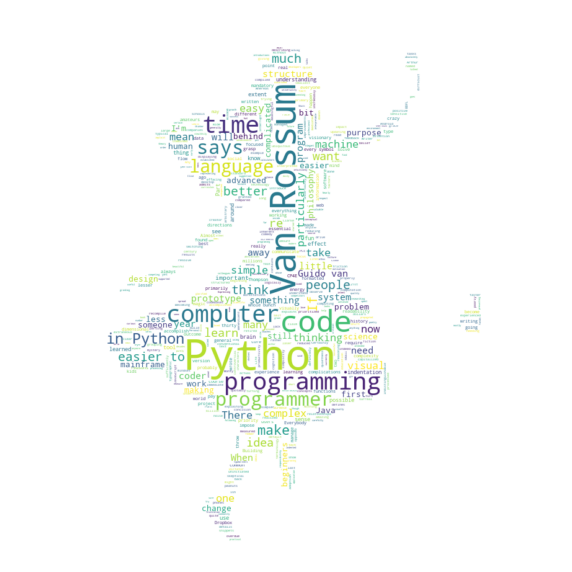

In [10]:
guido_story = open('../../data/raw/Guido.txt','r', encoding="utf8").read()
py_mask = np.array(Image.open('../../images/alice_mask.png'))
sw = set(STOPWORDS)
sw.add('way')
sw.add('write')
sw.add('cost')
guido_word = WordCloud(background_color='white', max_words=1000000, mask=py_mask, stopwords=sw)
guido_word.generate(guido_story)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(guido_word, interpolation='bilinear')
plt.axis('off')
plt.show()

---
<h1>REGRESSION PLOT</h1>

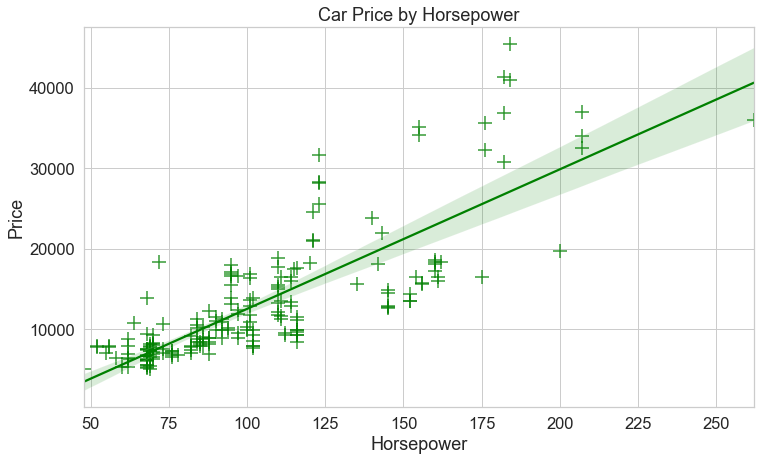

In [11]:
df_reg = dfv[['horsepower', 'price']]

plt.figure(figsize=(12,7))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='horsepower', y='price', data=df_reg, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Horsepower', ylabel='Price')
ax.set_title('Car Price by Horsepower')
plt.show()

---
<h1>GEOSPATIAL</h1>

In [12]:
house = pd.read_csv('../../data/raw/house_data.csv').head(50)
house.reset_index(drop=True, inplace=True)

count=0
ranges = list(map(str,range(0,10)))
ranges.append('-')
for i in range(len(house)):
    if str(house.loc[i,'lat'])[0] not in ranges:
        count+=1
    if str(house.loc[i,'long'])[0] not in ranges:
        count+=1

main_map = folium.Map(location=[47.6131746,-122.4821467], zoom_start=10)

sell = folium.map.FeatureGroup()

for la,lo,pr in zip(house.lat, house.long, house.price):
    sell.add_child(folium.features.CircleMarker([la,lo], radius=5, color='yellow', fill=True, fill_color='blue', popup='US$ '+str(pr), fill_opacity=0.6))

main_map.add_child(sell)

---
<h1>CHOROPLETH MAP (Pt.1)</h1>

In [13]:
df_cho = dfv[['country','price']]

world_geo = r'../../data/raw/world_countries.json'
car_map = folium.Map(location=[0,0], zoom_start=2, tiles='Mapbox Bright')

ts = np.linspace(df_cho['price'].min(), df_cho['price'].max(), 4, dtype=int)
ts = ts.tolist()
ts[-1] = ts[-1]+1  # make sure that the last value of the list is greater than the maximum

car_map.choropleth(geo_data=world_geo,
                   data=df_cho,
                   columns=['country','price'],
                   key_on='feature.properties.name',
                   fill_color='YlOrRd',
                   threshold_scale=ts,
                   fill_opacity=0.7,
                   line_opacity=0.2,
                   legend_name='Car Price Around the World',
                   reset=True)

car_map

---
<h1>CHOROPLETH MAP (Pt.2)</h1>

In [14]:
df = pd.read_csv('../../data/raw/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_crimes = df['PdDistrict'].value_counts().to_frame().reset_index()
df_crimes.rename(columns={'index':'Neighborhood','PdDistrict':'Count'}, inplace=True)

sanfran_geo = r'../../data/raw/san-francisco.geojson'

sanfran_map = folium.Map(location=[37.7781966,-122.4837685], zoom_start=12)

ts = np.linspace(df_crimes['Count'].min(), df_crimes['Count'].max(), 6, dtype=int)
ts = ts.tolist()
ts[-1] = ts[-1]+1  # make sure that the last value of the list is greater than the maximum

sanfran_map.choropleth(geo_data=sanfran_geo,
                   data=df_crimes,
                   columns=['Neighborhood','Count'],
                   key_on='feature.properties.name',
                   fill_color='YlOrRd',
                   threshold_scale=ts,
                   fill_opacity=0.7,
                   line_opacity=0.2,
                   legend_name='Crime Rate in San Francisco')

sanfran_map